In [11]:
import numpy as np
import scipy
from scipy.ndimage import gaussian_filter1d
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
%matplotlib inline
import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf
import pingouin as pg
import trial_correlates as tc
import tqdm
import misc

import switch_analysis_one_session as saos
reload(saos)

reload(misc)

from collections import OrderedDict

from scipy.spatial.distance import pdist, squareform, dice

67 sessions!


In [2]:
db_sorted = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
data_dir_full = db_sorted['data_dir_full'][0]

In [3]:
%%time
reload(pf)
place_field_res_l = OrderedDict()
for ii in tqdm.tqdm(range(len(db_sorted['data_dir_full']))):
    ddf = db_sorted['data_dir_full'][ii]
    pf_res =pf.field_detection_both_avg_trial_wrapper(ddf, dosave=True,force_reload=False,nbins = 100, 
                                        save_fn = 'place_field_avg_and_trial_vthresh.p', 
                                        shuffle_fn='fr_map_null_trialtype_vthresh.p',
                                        smth_in_bin=2.5, speed_thresh=1.,speed_key='v',load_only=True
                                        )
    ani = db_sorted.iloc[ii]['animal_name.1']
    sess = db_sorted.iloc[ii]['sess_name']
    place_field_res_l[ani,sess] = pf_res
    

  1%|▏         | 1/67 [00:00<00:09,  6.87it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  4%|▍         | 3/67 [00:00<00:12,  5.00it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  7%|▋         | 5/67 [00:01<00:12,  4.92it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 13%|█▎        | 9/67 [00:01<00:06,  9.24it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 16%|█▋        | 11/67 [00:01<00:05, 10.71it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210111/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211211/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 24%|██▍       | 16/67 [00:01<00:03, 14.29it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210203/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211210/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211124/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 34%|███▍      | 23/67 [00:02<00:02, 15.02it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 42%|████▏     | 28/67 [00:02<00:02, 18.62it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200809/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200809/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200812/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210314/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 46%|████▋     | 31/67 [00:02<00:01, 20.06it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210315/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210322/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 58%|█████▊    | 39/67 [00:02<00:01, 23.18it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201002/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200723/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200716/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200920/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200723/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 67%|██████▋   | 45/67 [00:03<00:01, 17.35it/s]

/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201129/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201125/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201129/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201206/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200917/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200918/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 78%|███████▊  | 52/67 [00:03<00:00, 23.54it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200719/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200923/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200720/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 84%|████████▎ | 56/67 [00:03<00:00, 26.54it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201001/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200717/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 94%|█████████▍| 63/67 [00:04<00:00, 15.56it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


100%|██████████| 67/67 [00:04<00:00, 14.78it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200823/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200824/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
CPU times: user 694 ms, sys: 121 ms, total: 816 ms
Wall time: 4.55 s


In [4]:
# load switch detection result
res_to_save_data_detection_l = pickle.load(open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess_highrepeats_swmag0dot4.p'),'rb'))

sess_selected = db_sorted.loc[db_sorted['n_pyr_putative'] >= 50,'sess_name']

switch_detection_res_allsess = {}
# for detection in ['avg','trial_filter']:
for detection in ['avg']:
    switch_detection_res_allsess[detection]={}
    for key in ['sig','cdf','changes_df']:
        switch_detection_res_allsess[detection][key] = pd.concat({k:val[detection][key] if val is not None else None for k,val in res_to_save_data_detection_l.items()},axis=0)
        switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
        
    switch_detection_res_allsess[detection]['sig_pos'] = switch_detection_res_allsess[detection]['sig'] * (switch_detection_res_allsess[detection]['cdf'] > 0.95)
    
    


/tmp/ipykernel_46800/3306167154.py:12: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/tmp/ipykernel_46800/3306167154.py:12: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]


In [5]:
# load data
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses = '*SessionPulses.Events.mat',filtered='*thetaFiltered*.mat')
# sessionPulses=mat_to_return['sessionPulses']
filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']
ripples = mat_to_return['ripples']


prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df'].as_dataframe()
beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
spike_trains = prep_res['spike_trains']

load *SessionPulses.Events.mat failed


In [6]:
ripples = mat_to_return['ripples']
ripple_events = ripples

cell_metrics=mat_to_return.cell_metrics
mergepoints = mat_to_return.mergepoints

cell_type_mask=mat_to_return['cell_type_mask']

# ripple cofiring

In [7]:
%%time
spike_times = cell_metrics.spikes.times
ripple_events_timestamps = ripple_events.timestamps


participation_mask_l_d_epochs=[]
ripple_time_ints_l_d_epochs=[]
for selected_interval in mergepoints.timestamps:
# selected_interval = mergepoints.timestamps[0]
    spike_times_in_ripple_l_d,mask_l_d, ripple_time_ints_l_d = {},{},{}
    for k,win in zip(['ripple_only','extended'],[None,[-0.2,0.1]]):
        spike_times_in_ripple_l_d[k], mask_l_d[k], ripple_time_ints_l_d[k] = prep.get_spike_times_in_ripple_l(spike_times,ripple_events_timestamps,selected_interval,ripple_window_extension=win,cell_type_mask=cell_type_mask)
        mask_l_d[k] = np.array(mask_l_d[k])


    rank_l_d,participation_mask_l_d = {},{}
    for k,stirl in spike_times_in_ripple_l_d.items():
        rank_l_d[k],participation_mask_l_d[k] = prep.get_first_spike_rank_all_ripples(stirl)
    participation_mask_l_d_epochs.append(participation_mask_l_d)
    ripple_time_ints_l_d_epochs.append(ripple_time_ints_l_d)

CPU times: user 1min 10s, sys: 3.08 s, total: 1min 13s
Wall time: 1min 13s


In [12]:
sim_df_l = []
for participation_mask_l_d in participation_mask_l_d_epochs:
    dist = pdist(participation_mask_l_d['ripple_only'].T,metric=dice)
    sim = 1 - squareform(dist)
    sim_df = pd.DataFrame(sim,index=cell_cols_d['pyr'].astype(int),columns=cell_cols_d['pyr'].astype(int))
    sim_df_l.append(sim_df)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/spatial/distance.py:1424: RuntimeWarning: invalid value encountered in true_divide
  return float((ntf + nft) / np.array(2.0 * ntt + ntf + nft))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/spatial/distance.py:1424: RuntimeWarning: invalid value encountered in true_divide
  return float((ntf + nft) / np.array(2.0 * ntt + ntf + nft))


In [44]:
sim_df_l[0]

,1,2,3,27,29,30,31,32,33,34,...,471,472,473,474,475,476,477,478,479,480
1,1.000000,0.050633,0.000000,0.060837,0.042076,0.027211,0.040146,0.054217,0.040541,0.045161,...,0.000000,0.000000,0.101266,0.044118,0.054054,0.149533,0.000000,0.048387,0.046243,0.050505
2,0.050633,1.000000,0.046512,0.036217,0.020468,0.024272,0.030829,0.033003,0.014210,0.042705,...,0.031250,0.000000,0.080000,0.018692,0.088889,0.076923,0.000000,0.084211,0.013889,0.010899
3,0.000000,0.046512,1.000000,0.032653,0.017725,0.004938,0.023438,0.013514,0.021583,0.029197,...,0.000000,0.043478,0.093023,0.000000,0.052632,0.056338,0.000000,0.022727,0.029197,0.016667
27,0.060837,0.036217,0.032653,1.000000,0.311229,0.244470,0.262940,0.208000,0.295050,0.203297,...,0.039139,0.032000,0.036217,0.061372,0.028455,0.057143,0.016632,0.059041,0.118443,0.235872
29,0.042076,0.020468,0.017725,0.311229,1.000000,0.340344,0.444059,0.226254,0.335840,0.242623,...,0.020057,0.017467,0.011696,0.099865,0.017673,0.056180,0.005988,0.043896,0.120823,0.369630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.149533,0.076923,0.056338,0.057143,0.056180,0.059091,0.040219,0.036254,0.037225,0.090615,...,0.043478,0.024691,0.051282,0.014815,0.136986,1.000000,0.000000,0.032520,0.000000,0.040506
477,0.000000,0.000000,0.000000,0.016632,0.005988,0.005051,0.007952,0.000000,0.010969,0.022642,...,0.125000,0.054054,0.000000,0.000000,0.000000,0.000000,1.000000,0.025316,0.000000,0.011396
478,0.048387,0.084211,0.022727,0.059041,0.043896,0.043764,0.049645,0.040230,0.036184,0.092025,...,0.073394,0.040816,0.105263,0.065789,0.066667,0.032520,0.025316,1.000000,0.010582,0.067961
479,0.046243,0.013889,0.029197,0.118443,0.120823,0.150198,0.091354,0.125945,0.085236,0.064000,...,0.012658,0.000000,0.000000,0.049751,0.000000,0.000000,0.000000,0.010582,1.000000,0.104121


In [6]:
ii=0
import glob
data_dir_full = db_sorted['data_dir_full'][ii]
cell_metrics=glob.glob(os.path.join(data_dir_full,'*cell_metrics.cellinfo.mat'))[0]
cell_metrics = dpn.loadmat_full(cell_metrics,'cell_metrics')

In [7]:
switch_detection_res_allsess[detection]['changes_df']

0   1   2   3   \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.4 3  0   0   1   0   0   
                                                      27 0   0   0   0   0   
                                                      29 0   0   0   0   0   
                                                         1   0   0   1   0   
                                                         2   0   1   0   0   
...                                                         ..  ..  ..  ..   
e16_1f1  e16_1f1_200923  0 1 0.3 switch_magnitude 0.4 50 2   0   0   0   1   
                                                      60 0   0   0   1   0   
                                                      61 1   0   0   0   0   
                                                      63 0   0   1   0   0   
                                                         1   0   0   0   0   

                                                            4   5    6    7   \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.4 3  0   0   0  0.0  0.0   
                                                      27 0   0   0  0.0  0.0   
                                                      29 0   0   1  0.0  0.0   
                                                         1  -1   0  0.0  0.0   
                                                         2   0   0  0.0  0.0   
...                                                         ..  ..  ...  ...   
e16_1f1  e16_1f1_200923  0 1 0.3 switch_magnitude 0.4 50 2   0  -1  0.0  0.0   
                                                      60 0   0   0  0.0  0.0   
                                                      61 1   0   0  0.0  0.0   
                                                      63 0   0   0  0.0 -1.0   
                                                         1   0   0  0.0 -1.0   

                                                             8    9   ...  \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.4 3  0  0.0  0.0  ...   
                                                      27 0  0.0  0.0  ...   
                                                      29 0  0.0  0.0  ...   
                                                         1  0.0  0.0  ...   
                                                         2  0.0  0.0  ...   
...                                                         ...  ...  ...   
e16_1f1  e16_1f1_200923  0 1 0.3 switch_magnitude 0.4 50 2  0.0  NaN  ...   
                                                      60 0  0.0  NaN  ...   
                                                      61 1  0.0  NaN  ...   
                                                      63 0  0.0  NaN  ...   
                                                         1  0.0  NaN  ...   

                                                             27   28   29  \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.4 3  0  0.0  0.0  0.0   
                                                      27 0  0.0  0.0  0.0   
                                                      29 0  0.0  0.0  0.0   
                                                         1  0.0  0.0  0.0   
                                                         2  0.0  0.0  0.0   
...                                                         ...  ...  ...   
e16_1f1  e16_1f1_200923  0 1 0.3 switch_magnitude 0.4 50 2  NaN  NaN  NaN   
                                                      60 0  NaN  NaN  NaN   
                                                      61 1  NaN  NaN  NaN   
                                                      63 0  NaN  NaN  NaN   
                                                         1  NaN  NaN  NaN   

                                                             30   31   32  33  \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.4 3  0  0.0  0.0  0.0 NaN   
                                                      27 0  0.0  0.0  0.0 NaN   
                                                      29 0  0.0  0.0 

In [45]:
reload(cpa)

<module 'change_point_analysis' from '/mnt/home/szheng/projects/nmf_analysis/change_point_analysis.py'>

In [27]:
ani = 'e13_26m1'
sess='e13_26m1_210913'
task_ind,trial_type=(0,0)
onoff_outer_d = {}
changes_shuffle_d = {}

fr_df = place_field_res_l[ani,sess]['avg']['params'][task_ind,trial_type].loc['fr_mean']
fr_df_shuffle = cpa.gen_circular_shuffle(fr_df,500)
fr_corr = fr_df.T.corr()

for sw_type in ['raw',0.3]:
    one_ind =(ani,sess,task_ind,trial_type,sw_type,'switch_magnitude',0.4)
    changes_df = switch_detection_res_allsess[detection]['changes_df'].loc[one_ind]
    
    # inds_d = cpa.get_inds_switch_sametrial_sorted(changes_df)
    changes_shuffle_d[sw_type] = cpa.gen_circular_shuffle(changes_df.dropna(axis=1),500)
    
    
    
    _,_,_,_,_,onoff_outer=cpa.get_shared_onoff(changes_df,return_outer=True)
    onoff_outer_d[sw_type] = onoff_outer

/tmp/ipykernel_46800/978203729.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df = switch_detection_res_allsess[detection]['changes_df'].loc[one_ind]


In [131]:
def reduce_get_triu_flatten_base(mat,mask = None):
    '''
    reduce multi field to one field using the max (similarity) value
    then get the upper tri elements, flattened
    mask: see get_onoff_outer_reduced_flatten
    '''
    mat_reduced = mat.groupby(level=0).max().groupby(level=0,axis=1).max() # reduce multi field to one field using the max (similarity) value
    neurons_left = mat_reduced.index
    mat_val = mat_reduced.values
    
    mat_triu_inds = np.triu_indices(mat_val.shape[0],1)
    flattened = mat_val[mat_triu_inds]
    
    if mask is not None:
        mask_reduced = mask.groupby(level=0).max().groupby(level=0,axis=1).max() 
        mask_flattened =  mask_reduced.values[mat_triu_inds]
        flattened_masked = flattened[np.logical_not(mask_flattened)]
        return flattened_masked,neurons_left,flattened,mask_flattened
    else:
        return flattened,neurons_left

def reduce_get_triu_flatten(mat,mask=None):
    '''
    '''
    if mask is None:
        return reduce_get_triu_flatten_base(mat,mask = None)
    else:
        flattened_masked,neurons_left,flattened,mask_flattenereduce_get_triu_flatten_base(mat,mask = None)
        return flattened, neurons_left
    
    

In [123]:
def get_onoff_outer_reduced_flatten(changes_df,mask=None):
    '''
    mask: mask out pairs that are too close, 1 to mask out 0 to keep; first try conservative: if two fields are two close, then the two neurons are eliminated
    '''
    _,_,_,_,_,onoff_outer = cpa.get_shared_onoff(changes_df,return_outer=True)
    onoff_outer_reduced_flatten_d = {}
    for k in onoff_outer.keys():
#         outer_reduced_one = onoff_outer[k].groupby(level=0).max().groupby(level=0,axis=1).max() # reduce multi fields in the same neuron using OR

#         neurons_left = outer_reduced_one.index # should be the same across on off
#         triu_inds = np.triu_indices(neurons_left.shape[0],1)
#         onoff_outer_reduced_flatten=outer_reduced_one.values[triu_inds]
        
        onoff_outer_reduced_flatten,neurons_left = reduce_get_triu_flatten(onoff_outer[k],mask = mask)
        
        
        onoff_outer_reduced_flatten_d[k] = onoff_outer_reduced_flatten
    return onoff_outer_reduced_flatten_d,neurons_left
    
    
    
    
    
    

In [75]:
neurons_left_old= neurons_left

In [76]:
_,neurons_left = get_onoff_outer_reduced_flatten(cs)

In [53]:
onoff_outer_reduced_flatten_d_l = []
# sw_type = 'raw'
sw_type = 0.3
for cs in changes_shuffle_d[sw_type]:
    onoff_outer_reduced_flatten_d,neurons_left = get_onoff_outer_reduced_flatten(cs)
    onoff_outer_reduced_flatten_d_l.append(onoff_outer_reduced_flatten_d)

In [85]:
fr_corr_flat,_ = reduce_get_triu_flatten(fr_corr)
fr_corr_flat_l = []
for frs in fr_df_shuffle:
    fr_shuffle_corr = frs.T.corr()
    fr_corr_flat,_ = reduce_get_triu_flatten(fr_shuffle_corr)
    fr_corr_flat_l.append(fr_corr_flat)

In [55]:
onoff = 1
onoff_outer_reduced_flatten_d_onoff = {onoff:
                                       [onoff_outer_reduced_flatten_d[onoff] for onoff_outer_reduced_flatten_d in onoff_outer_reduced_flatten_d_l]
                                       for onoff in [1,-1]
                                      }
onoff_outer_reduced_flatten_d_1 = onoff_outer_reduced_flatten_d_onoff[onoff]



In [56]:
# one_ind = ('e13_26m1','e13_26m1_210913',0,0,sw_type,'switch_magnitude',0.4)
one_ind =(ani,sess,task_ind,trial_type,sw_type,'switch_magnitude',0.4)

changes_df = switch_detection_res_allsess[detection]['changes_df'].loc[one_ind]
onoff_outer_reduced_flatten_d_data,neurons_left = get_onoff_outer_reduced_flatten(changes_df.dropna(axis=1))
a=onoff_outer_reduced_flatten_d_data[onoff]

# b = sim_df_l[1].loc[neurons_left,neurons_left].values[upper_triu_inds]
# b = sim_df_l[1].fillna(0).loc[neurons_left,neurons_left].values[upper_triu_inds]
b_l = [reduce_get_triu_flatten(sim_df.fillna(0).loc[neurons_left,neurons_left].values)[0] for sim_df in sim_df_l]


r_null_l = []
r_data_l = []
for b in b_l:
    r_null=np.array([scipy.stats.spearmanr(b,oorfd) for oorfd in onoff_outer_reduced_flatten_d_1])
    r_data = scipy.stats.spearmanr(b,a)
    
    r_null_l.append(r_null)
    r_data_l.append(r_data)

/tmp/ipykernel_46800/844809307.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df = switch_detection_res_allsess[detection]['changes_df'].loc[one_ind]


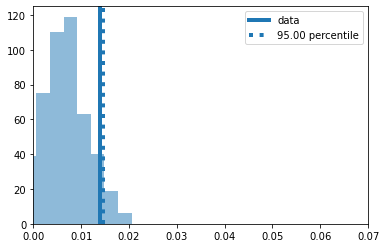

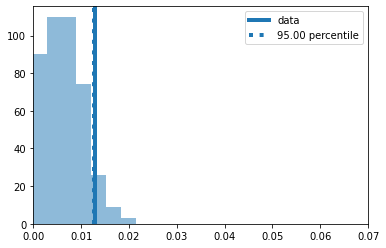

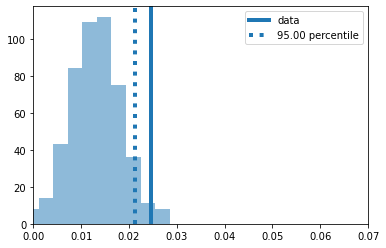

In [57]:
for r_null,r_data in zip(r_null_l,r_data_l):
    ph.plot_shuffle_data_dist_with_thresh(r_null[:,0],r_data[0],alpha=0.05,fig=None,ax=None,lw=4)
    plt.xlim(0,0.07)


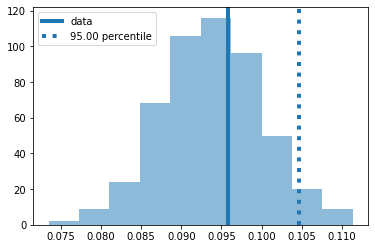

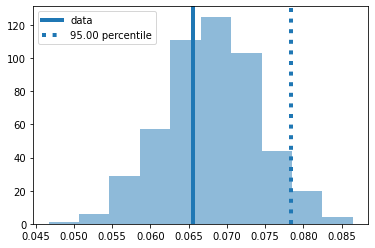

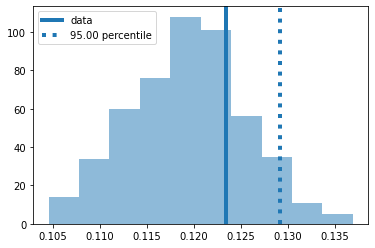

In [89]:
# using correlation on firing rate by trial
r_null_l = []
r_data_l = []
for b in b_l:
    a = fr_corr_flat
    r_null=np.array([scipy.stats.spearmanr(b,ff) for ff in fr_corr_flat_l])
    r_data = scipy.stats.spearmanr(b,a)
    
    r_null_l.append(r_null)
    r_data_l.append(r_data)

for r_null,r_data in zip(r_null_l,r_data_l):
    ph.plot_shuffle_data_dist_with_thresh(r_null[:,0],r_data[0],alpha=0.05,fig=None,ax=None,lw=4)
#     plt.xlim(0,0.07)


In [118]:
# excluding closeby fields

com_dist_thresh = 2 
com_all_fields=place_field_res_l[ani,sess]['avg']['all_fields'][task_ind,trial_type]['com']
dist_thresh_mask = np.abs(np.subtract.outer(com_all_fields.values,com_all_fields.values)) < com_dist_thresh
dist_thresh_mask = pd.DataFrame(dist_thresh_mask,index=com_all_fields.index,columns=com_all_fields.index)
# reduce_get_triu_flatten(fr_corr,mask=dist_thresh_mask)

In [124]:
onoff_outer_reduced_flatten_d_l = []
# sw_type = 'raw'
sw_type = 0.3
for cs in changes_shuffle_d[sw_type]:
    onoff_outer_reduced_flatten_d,neurons_left = get_onoff_outer_reduced_flatten(cs,mask=dist_thresh_mask)
    onoff_outer_reduced_flatten_d_l.append(onoff_outer_reduced_flatten_d)
onoff = 1
onoff_outer_reduced_flatten_d_onoff = {onoff:
                                       [onoff_outer_reduced_flatten_d[onoff] for onoff_outer_reduced_flatten_d in onoff_outer_reduced_flatten_d_l]
                                       for onoff in [1,-1]
                                      }
onoff_outer_reduced_flatten_d_1 = onoff_outer_reduced_flatten_d_onoff[onoff]



In [144]:
import change_point_rsa as cpr
reload(cpr)

<module 'change_point_rsa' from '/mnt/home/szheng/projects/nmf_analysis/change_point_rsa.py'>

In [145]:
onoff_outer_reduced_flatten_d,neurons_left,flattened_no_mask,mask_flattened = cpr.get_onoff_outer_reduced_flatten(changes_df,mask=mask)


b_l = []
for sim_df in sim_df_l:
    ripple_sim_flattened_masked, _,ripple_sim_flattened, _ = cpr.reduce_get_triu_flatten(sim_df.fillna(0).loc[neurons_left,neurons_left],mask=mask)
    b_l.append(ripple_sim_flattened[mask_flattened])                                                                                 

cs_flat_l = []
onoff = 1
for cs in changes_shuffle_d[0.3]:
    cs_flattened_ma, _,cs_flattened, ma_flat = cpr.get_onoff_outer_reduced_flatten(cs,mask=mask)
    cs_flat_l.append(cs_flattened[onoff][ma_flat])
    
    
    
    

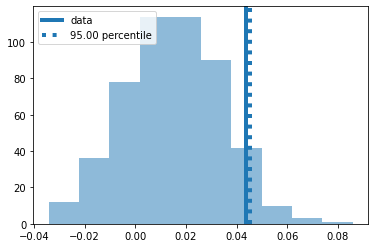

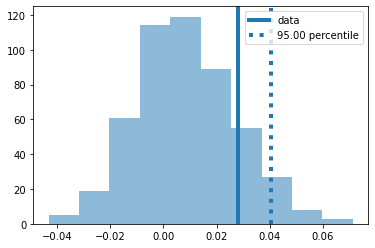

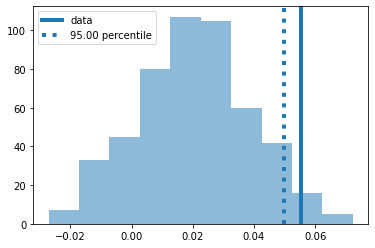

In [167]:
r_null_l = []
r_data_l = []
for b in b_l:
    a = flattened_no_mask[1][mask_flattened]
    r_null=np.array([scipy.stats.spearmanr(b,csf) for csf in cs_flat_l])
    r_data = scipy.stats.spearmanr(b,a)
    
    r_null_l.append(r_null)
    r_data_l.append(r_data)

for r_null,r_data in zip(r_null_l,r_data_l):
    ph.plot_shuffle_data_dist_with_thresh(r_null[:,0],r_data[0],alpha=0.05,fig=None,ax=None,lw=4)
#     plt.xlim(0,0.07)


In [170]:
fr_corr_flat[mask_flattened]

array([ 0.16300497, -0.21217791,  0.27771664, ..., -0.34755568,
        0.36554203, -0.31111826])

In [172]:
fr_corr_flat_l

NameError: name 'fr_corr_l' is not defined

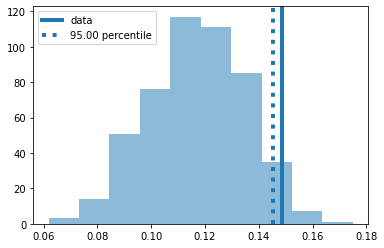

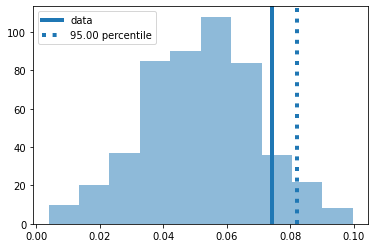

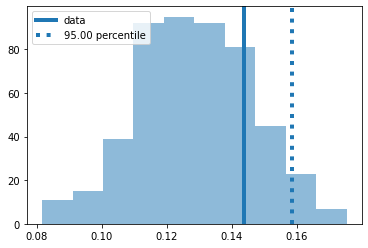

In [173]:
# close field only, raw correlation
r_null_l = []
r_data_l = []
for b in b_l:
    a = fr_corr_flat[mask_flattened]
    r_null=np.array([scipy.stats.spearmanr(b,fc[mask_flattened]) for fc in fr_corr_flat_l])
    r_data = scipy.stats.spearmanr(b,a)
    
    r_null_l.append(r_null)
    r_data_l.append(r_data)

for r_null,r_data in zip(r_null_l,r_data_l):
    ph.plot_shuffle_data_dist_with_thresh(r_null[:,0],r_data[0],alpha=0.05,fig=None,ax=None,lw=4)
#     plt.xlim(0,0.07)


(2739,)

In [153]:
scipy.stats.spearmanr(b_l[2],flattened_no_mask[1][mask_flattened])

SpearmanrResult(correlation=0.055429326608028746, pvalue=0.003709946568269972)

In [154]:
mask

3      27     29                   30     31     32   \
field_index          0      0      0      1      2      0      0      1   
    field_index                                                           
3   0             True  False  False  False  False  False  False  False   
27  0            False   True  False  False  False  False  False  False   
29  0            False  False   True  False  False  False  False  False   
    1            False  False  False   True  False  False  False  False   
    2            False  False  False  False   True  False  False   True   
...                ...    ...    ...    ...    ...    ...    ...    ...   
463 1            False  False  False  False  False  False  False  False   
465 0            False  False  False  False  False  False  False  False   
475 0             True  False  False  False  False  False  False  False   
476 0             True  False  False  False  False  False  False  False   
480 0            False  False  False  False  False  False   True  False   

                   33     34   ...    454    455    456    462    463         \
field_index          0      0  ...      0      0      0      0      0      1   
    field_index                ...                                             
3   0            False  False  ...  False  False  False  False  False  False   
27  0            False  False  ...  False  False  False  False  False  False   
29  0            False  False  ...  False   True  False  False  False  False   
    1             True  False  ...  False  False  False  False  False  False   
    2            False  False  ...  False  False  False  False  False  False   
...                ...    ...  ...    ...    ...    ...    ...    ...    ...   
463 1            False  False  ...  False  False  False  False  False   True   
465 0            False  False  ...  False  False  False   True  False  False   
475 0            False  False  ...  False  False  False  False  False  False   
476 0            False  False  ...  False  False  False  False  False  False   
480 0            False  False  ...  False  False  False  False  False  False   

                   465    475    476    480  
field_index          0      0      0      0  
    field_index                              
3   0            False   True   True  False  
27  0            False  False  False  False  
29  0            False  False  False  False  
    1            False  False  False  False  
    2            False  False  False  False  
...                ...    ...    ...    ...  
463 1            False  False  False  False  
465 0             True  False  False  False  
475 0            False   True   True  False  
476 0            False   True   True  False  
480 0            False  False  False   True  

[386 rows x 386 columns]

In [140]:
b[mask_flattened]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 31714 but corresponding boolean dimension is 34453

In [130]:
mask

3      27     29                   30     31     32   \
field_index          0      0      0      1      2      0      0      1   
    field_index                                                           
3   0             True  False  False  False  False  False  False  False   
27  0            False   True  False  False  False  False  False  False   
29  0            False  False   True  False  False  False  False  False   
    1            False  False  False   True  False  False  False  False   
    2            False  False  False  False   True  False  False   True   
...                ...    ...    ...    ...    ...    ...    ...    ...   
463 1            False  False  False  False  False  False  False  False   
465 0            False  False  False  False  False  False  False  False   
475 0             True  False  False  False  False  False  False  False   
476 0             True  False  False  False  False  False  False  False   
480 0            False  False  False  False  False  False   True  False   

                   33     34   ...    454    455    456    462    463         \
field_index          0      0  ...      0      0      0      0      0      1   
    field_index                ...                                             
3   0            False  False  ...  False  False  False  False  False  False   
27  0            False  False  ...  False  False  False  False  False  False   
29  0            False  False  ...  False   True  False  False  False  False   
    1             True  False  ...  False  False  False  False  False  False   
    2            False  False  ...  False  False  False  False  False  False   
...                ...    ...  ...    ...    ...    ...    ...    ...    ...   
463 1            False  False  ...  False  False  False  False  False   True   
465 0            False  False  ...  False  False  False   True  False  False   
475 0            False  False  ...  False  False  False  False  False  False   
476 0            False  False  ...  False  False  False  False  False  False   
480 0            False  False  ...  False  False  False  False  False  False   

                   465    475    476    480  
field_index          0      0      0      0  
    field_index                              
3   0            False   True   True  False  
27  0            False  False  False  False  
29  0            False  False  False  False  
    1            False  False  False  False  
    2            False  False  False  False  
...                ...    ...    ...    ...  
463 1            False  False  False  False  
465 0             True  False  False  False  
475 0            False   True   True  False  
476 0            False   True   True  False  
480 0            False  False  False   True  

[386 rows x 386 columns]

In [128]:
mask = dist_thresh_mask
# one_ind = ('e13_26m1','e13_26m1_210913',0,0,sw_type,'switch_magnitude',0.4)
one_ind =(ani,sess,task_ind,trial_type,sw_type,'switch_magnitude',0.4)

changes_df = switch_detection_res_allsess[detection]['changes_df'].loc[one_ind]
onoff_outer_reduced_flatten_d_data,neurons_left = get_onoff_outer_reduced_flatten(changes_df.dropna(axis=1),mask=mask)
a=onoff_outer_reduced_flatten_d_data[onoff]

# b = sim_df_l[1].loc[neurons_left,neurons_left].values[upper_triu_inds]
# b = sim_df_l[1].fillna(0).loc[neurons_left,neurons_left].values[upper_triu_inds]
b_l = [reduce_get_triu_flatten(sim_df.fillna(0).loc[neurons_left,neurons_left],mask=mask)[0] for sim_df in sim_df_l]


r_null_l = []
r_data_l = []
for b in b_l:
    r_null=np.array([scipy.stats.spearmanr(b,oorfd) for oorfd in onoff_outer_reduced_flatten_d_1])
    r_data = scipy.stats.spearmanr(b,a)
    
    r_null_l.append(r_null)
    r_data_l.append(r_data)

/tmp/ipykernel_46800/54878470.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df = switch_detection_res_allsess[detection]['changes_df'].loc[one_ind]


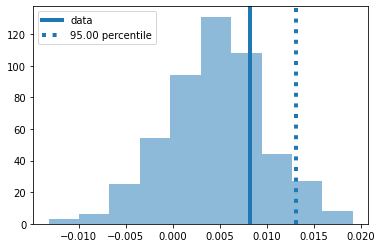

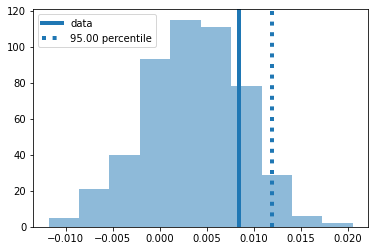

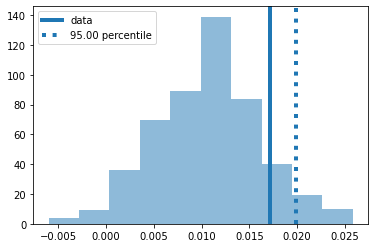

In [129]:
for r_null,r_data in zip(r_null_l,r_data_l):
    ph.plot_shuffle_data_dist_with_thresh(r_null[:,0],r_data[0],alpha=0.05,fig=None,ax=None,lw=4)


In [106]:
get_onoff_outer_reduced_flatten(changes_df.dropna(axis=1))[1]

array([False, False, False, ..., False, False, False])

In [53]:
outer_reduced_one = onoff_outer_d[0.3][1].groupby(level=0).any().groupby(level=0,axis=1).any()

In [66]:
neurons_left = outer_reduced_one.index

In [71]:
upper_triu_inds = np.triu_indices(neurons_left.shape[0],1)

In [74]:
a=outer_reduced_one.values[upper_triu_inds]

In [75]:
b=sim_df_l[0].loc[neurons_left,neurons_left].values[upper_triu_inds]

In [77]:
scipy.stats.spearmanr(a,b)

SpearmanrResult(correlation=0.013912319827687855, pvalue=0.009812454823304858)

In [85]:
scipy.stats.spearmanr(np.random.permutation(a),b)

SpearmanrResult(correlation=-0.002545550393954663, pvalue=0.6365867466260751)

In [86]:
a

array([False, False, False, ..., False, False, False])

In [35]:
from scipy.spatial.distance import pdist, dice, squareform

In [37]:
dice(np.triu(onoff_outer_d['raw'][1],1).flatten(),np.triu(onoff_outer_d[0.3][1],1).flatten())

0.9092702169625246

In [12]:
changes_df

0   1   2   3   4   5    6    7    8    9   ...   27   28   29   30  \
3   0   0   1   0   0   0   0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
27  0   0   0   0   0   0   0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
29  0   0   0   0   0   0   1  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
    1   0   0   1   0  -1   0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
    2   0   1   0   0   0   0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
...    ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
463 1   0  -1   0  -1   1   0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0 -1.0   
465 0   0   0   0   0   0   0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
475 0   0  -1   0   0   0   0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
476 0   0  -1   0   0   0   0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
480 0   0   0  -1   0   0   0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   

        31   32  33  34  35  36  
3   0  0.0  0.0 NaN NaN NaN NaN  
27  0  0.0  0.0 NaN NaN NaN NaN  
29  0  0.0  0.0 NaN NaN NaN NaN  
    1  0.0  0.0 NaN NaN NaN NaN  
    2  0.0  0.0 NaN NaN NaN NaN  
...    ...  ...  ..  ..  ..  ..  
463 1  0.0  1.0 NaN NaN NaN NaN  
465 0  1.0 -1.0 NaN NaN NaN NaN  
475 0  0.0  0.0 NaN NaN NaN NaN  
476 0  0.0  0.0 NaN NaN NaN NaN  
480 0  0.0  0.0 NaN NaN NaN NaN  

[386 rows x 37 columns]

In [21]:
shankid = pd.Series(cell_metrics['shankID'].astype(int),index=cell_metrics['UID'].astype(int))

3      6
29     5
35     2
45     3
46     6
57     1
120    6
140    6
169    4
176    7
177    3
186    1
208    1
217    1
227    5
231    7
233    1
245    3
262    6
265    1
268    6
269    6
284    3
290    6
301    6
313    7
427    2
dtype: int64

In [28]:
all_place_cells = np.array([x[0] for x in changes_df.index])

(array([41., 51., 60.,  0., 44., 49.,  0., 77., 35., 29.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

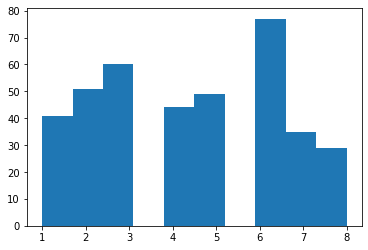

In [30]:
%matplotlib inline
plt.hist(shankid.loc[all_place_cells])

(array([2., 6., 3., 0., 7., 2., 0., 7., 2., 2.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

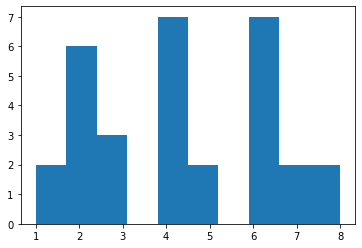

In [36]:
inds_one = inds_d.loc[1,4].apply(lambda x:x[0])
shankid.loc[inds_one]
plt.hist(shankid.loc[inds_one])

In [66]:
import scipy.stats as ss
from scipy.stats import wasserstein_distance


In [67]:
wasserstein_distance(shankid.loc[inds_one],shankid.loc[all_place_cells])

0.23107136887848906

In [70]:
n_sw_one_trial = len(inds_one)

(array([17., 24., 24.,  8., 13.,  7.,  2.,  2.,  2.,  1.]),
 array([0.13279291, 0.22326592, 0.31373893, 0.40421193, 0.49468494,
        0.58515795, 0.67563095, 0.76610396, 0.85657697, 0.94704997,
        1.03752298]),
 <BarContainer object of 10 artists>)

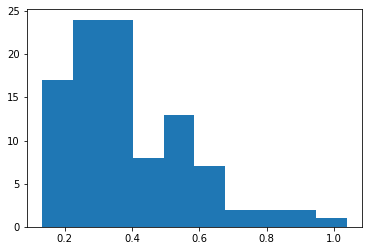

In [75]:
n_shuffle=100
d_l = []
for i in range(n_shuffle):
    inds_shuffled = np.random.permutation(all_place_cells)[:n_sw_one_trial]
    d = wasserstein_distance(shankid.loc[inds_shuffled],shankid.loc[all_place_cells])
    d_l.append(d)
plt.hist(d_l)

In [59]:
shankid_selected=shankid.loc[inds_one]
same_trial_same_shank = shankid_selected.loc[(shankid_selected==4)].index

In [62]:
com_df_one = place_field_res_l['e13_26m1','e13_26m1_210913']['avg']['all_fields'][0,0]['com']

In [65]:
com_df_one.loc[(same_trial_same_shank,slice(None))]

     field_index
59   0              13
100  0              68
148  0              72
206  0              58
280  0              16
312  0               9
385  0               9
Name: com, dtype: object

In [7]:
cell_metrics['shankID']

array([8., 4., 6., 5., 1., 4., 4., 8., 7., 8., 5., 6., 1., 5., 7., 3., 8.,
       5., 3., 4., 7., 6., 3., 3., 1., 2., 6., 8., 5., 2., 7., 8., 8., 5.,
       2., 5., 8., 5., 6., 3., 7., 5., 2., 7., 3., 6., 7., 2., 1., 5., 2.,
       1., 8., 4., 5., 2., 1., 4., 4., 2., 5., 7., 2., 4., 1., 3., 3., 2.,
       7., 1., 3., 3., 6., 4., 4., 8., 2., 1., 6., 6., 4., 5., 5., 6., 7.,
       7., 5., 7., 1., 7., 6., 7., 4., 2., 8., 4., 7., 3., 7., 4., 8., 3.,
       3., 8., 1., 4., 1., 1., 6., 8., 7., 6., 8., 2., 3., 5., 2., 4., 8.,
       6., 6., 5., 3., 3., 5., 6., 6., 3., 5., 2., 5., 3., 3., 6., 8., 5.,
       3., 6., 8., 6., 3., 1., 8., 2., 6., 1., 8., 4., 4., 7., 8., 6., 3.,
       6., 2., 5., 1., 5., 7., 8., 6., 4., 3., 5., 3., 2., 8., 3., 4., 5.,
       6., 7., 5., 6., 3., 7., 3., 1., 4., 4., 2., 3., 6., 7., 5., 1., 8.,
       6., 4., 7., 2., 7., 6., 1., 6., 7., 3., 3., 4., 6., 2., 3., 1., 8.,
       2., 4., 5., 1., 6., 5., 6., 5., 6., 6., 8., 2., 1., 2., 5., 1., 1.,
       5., 1., 2., 5., 1.